In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
from numpy import genfromtxt

In [9]:
data = genfromtxt('heart.csv', delimiter=',', skip_header=1)
data

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [5]:
from sklearn.ensemble import IsolationForest

In [18]:
clf = IsolationForest(random_state=0).fit(data)
train = clf.fit_predict(data)
print(train)
train2 = clf.predict(data)
print(train2)

[-1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1
 -1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1
  1 -1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1  1
  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1
  1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1]
[-1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1
 -1 

In [30]:
data_cleaned = [];
for i, b in zip(train2, data):
    if i == 1:
        data_cleaned.append(b)


In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(data, train2)
model.predict_proba(data)

array([[0.96167074, 0.03832926],
       [0.32258209, 0.67741791],
       [0.05350968, 0.94649032],
       [0.01724773, 0.98275227],
       [0.04292981, 0.95707019],
       [0.08184926, 0.91815074],
       [0.15970876, 0.84029124],
       [0.01106195, 0.98893805],
       [0.54581679, 0.45418321],
       [0.07158834, 0.92841166],
       [0.02385818, 0.97614182],
       [0.12816662, 0.87183338],
       [0.0272023 , 0.9727977 ],
       [0.2229893 , 0.7770107 ],
       [0.80137334, 0.19862666],
       [0.19458117, 0.80541883],
       [0.05561754, 0.94438246],
       [0.80492529, 0.19507471],
       [0.03296137, 0.96703863],
       [0.49557979, 0.50442021],
       [0.0206571 , 0.9793429 ],
       [0.07252989, 0.92747011],
       [0.01626235, 0.98373765],
       [0.88495617, 0.11504383],
       [0.11779476, 0.88220524],
       [0.23879628, 0.76120372],
       [0.61194228, 0.38805772],
       [0.05449293, 0.94550707],
       [0.78273104, 0.21726896],
       [0.820877  , 0.179123  ],
       [0.

In [42]:
model.predict(data)

array([-1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1

In [43]:
model.score(data, train2)

0.858085808580858

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(train2, model.predict(data))

In [49]:
from matplotlib import pyplot as plt

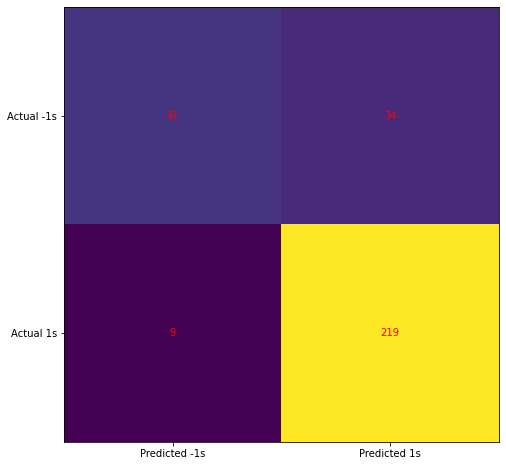

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -1s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -1s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model2 = RandomForestClassifier(max_depth=2, random_state=0).fit(data, train2)
model2.predict(data)

array([-1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1

In [63]:
model2.predict_proba(data)

array([[0.63061541, 0.36938459],
       [0.42295717, 0.57704283],
       [0.14807079, 0.85192921],
       [0.14870541, 0.85129459],
       [0.16275817, 0.83724183],
       [0.20384332, 0.79615668],
       [0.16283703, 0.83716297],
       [0.15138532, 0.84861468],
       [0.53435875, 0.46564125],
       [0.16429589, 0.83570411],
       [0.1538853 , 0.8461147 ],
       [0.15895321, 0.84104679],
       [0.1468363 , 0.8531637 ],
       [0.18733884, 0.81266116],
       [0.44925912, 0.55074088],
       [0.15409238, 0.84590762],
       [0.16106743, 0.83893257],
       [0.41738065, 0.58261935],
       [0.15629332, 0.84370668],
       [0.20358325, 0.79641675],
       [0.14870541, 0.85129459],
       [0.15267942, 0.84732058],
       [0.1468363 , 0.8531637 ],
       [0.42242657, 0.57757343],
       [0.19849566, 0.80150434],
       [0.23729753, 0.76270247],
       [0.39799727, 0.60200273],
       [0.16281488, 0.83718512],
       [0.43545443, 0.56454557],
       [0.55467448, 0.44532552],
       [0.

In [64]:
model2.score(data,train2)

0.8184818481848185

In [66]:
cm2 = confusion_matrix(train2, model2.predict(data))

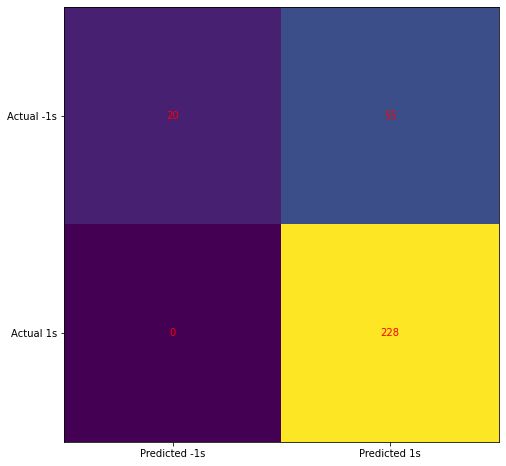

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm2)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -1s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -1s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm2[i, j], ha='center', va='center', color='red')
plt.show()

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [82]:
model3 = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(data, train2)

In [84]:
model3.predict(data)

array([-1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1

In [85]:
model3.score(data,train2)

0.976897689768977

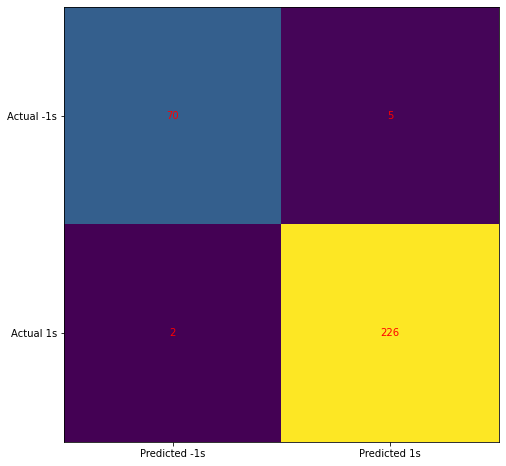

In [121]:
cm3 = confusion_matrix(train2, model3.predict(data))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -1s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -1s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm3[i, j], ha='center', va='center', color='red')
plt.show()

In [97]:
train = []
test = []
for i in range(len(data)):
    if i < 100:
        test.append(data[i])
    else:
        train.append(data[i])
len(test)

100

In [104]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [105]:
test_y = IsolationForest(random_state=0).fit(test).fit_predict(test)
print(test_y)
train_y = IsolationForest(random_state=0).fit(train).fit_predict(train)
print(train_y)

[-1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1
 -1 -1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1
  1 -1  1 -1]
[-1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1
  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1
  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1  1 -1  1  1 -1  1  1 -1  1  1]


In [155]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(train, train_y)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [156]:
pred_y = model.predict(test)

In [181]:
model.score(test, test_y)

0.78

In [182]:
model.score(train, train_y)

0.8916256157635468

In [159]:
confusion_matrix(test_y, pred_y)

array([[12, 15],
       [ 7, 66]], dtype=int64)

In [161]:
from sklearn.metrics import plot_confusion_matrix

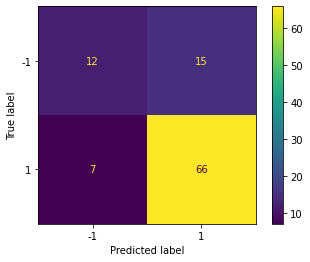

In [162]:
plot_confusion_matrix(model, test, test_y) 

0.82
0.9556650246305419


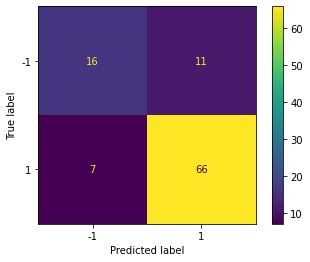

In [179]:
model2 = SVC(random_state=0).fit(train, train_y)
plot_confusion_matrix(model2, test, test_y)
print(model2.score(test, test_y))
print(model2.score(train, train_y))

0.76
0.8275862068965517


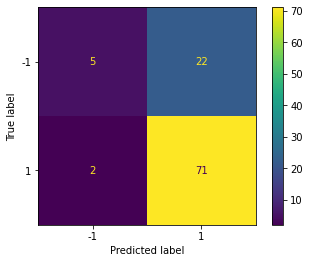

In [184]:
model3 = RandomForestClassifier(max_depth=2, random_state=0).fit(train, train_y)
plot_confusion_matrix(model3, test, test_y)
print(model3.score(test, test_y))
print(model3.score(train, train_y))